<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Model/Regression_Trees_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#​imports including DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [5]:
#load data
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/cali_housing.csv"
df = pd.read_csv(fpath)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Assign Your Target Vector and Features Matrix

In [6]:
X=df.drop(columns="MedHouseVal")
y=df['MedHouseVal']

# Train Test Split (Model Validation).


In [8]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69
3746,6.3703,32.0,6.000000,0.990196,1159.0,2.272549,34.16,-118.41
13073,2.3684,17.0,4.795858,1.035503,706.0,2.088757,38.57,-121.33


# Decision Tree


## Make an instance of the Model

In [10]:
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(random_state=42)

## Fit the model using your training data

The model is learning the relationship between the features (X) and the target (y).



In [11]:
#Fitting our Decision Tree to our training data
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Predict the target values for the training set and the test set.

In [12]:
# Make predictions for training and testing data
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

## Evaluate the Model

In [16]:
# evaluate the model
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 1.0
Test score: 0.600578011919574


## Tune the Model

The output will be all of the parameters you can adjust when you instantiate that type of model.

In [17]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Depth of Tree

In [18]:
## What was the depth of our default tree?
dec_tree.get_depth()

36

### # of Leaf Nodes

In [19]:
# How many leaf nodes?
dec_tree.get_n_leaves()

14841

#Finding the Optimal max_depth (hyperparameter tuning)

In [20]:
# Let's go extreme and set our max depth to 2
dec_tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
# Fit on training data
dec_tree_2.fit(X_train, y_train)
# Get predictions 
train_preds = dec_tree_2.predict(X_train)
test_preds = dec_tree_2.predict(X_test)
# Calculate r2 score
train_2_score = r2_score(y_train, train_preds)
test_2_score = r2_score(y_test, test_preds)
# Print results
print(f"Train Model R2: {train_2_score}")
print(f"Test Model R2: {test_2_score}")

Train Model R2: 0.45120526546918793
Test Model R2: 0.4308859489546041


^^ The R2 shows low train and test score meaning our model is underfitting.

In [23]:
# Instantiate model with max_depth of 15
dec_tree_15 = DecisionTreeRegressor(max_depth=15, random_state=42)
# Fit on training data
dec_tree_15.fit(X_train, y_train)
#Get Predictions
train_preds = dec_tree_15.predict(X_train)
test_preds = dec_tree_15.predict(X_test)
#Calculate r2 score
train_15_score = r2_score(y_train, train_preds)
test_15_score = r2_score(y_test, test_preds)
#Print score
print(f"Training Model R2: {train_15_score:,.2f}")
print(f"Teset Model R2: {train_15_score:,.2f}")

Training Model R2: 0.96
Teset Model R2: 0.96


#Using For Loop to find the Best max_depth

In [26]:
# List of values to try for max_depth:
depths = list(range(2, 36))  # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=["Test Score", "Train Score"])
# Loop through depths
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    # Get predictions 
    train_preds = dec_tree.predict(X_train)
    test_preds = dec_tree.predict(X_test)
    # Calculate score
    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)
    # Add scores to dataframe
    scores.loc[depth, "Train Score"] = train_score
    scores.loc[depth, "Test Score"] = test_score
    # Print the results
    print(f"When depth is {depth}.")
    print(f" - the training r2 is {train_score.round(3)}.")
    print(f" - the test r2 is {test_score.round(3)}.")


When depth is 2.
 - the training r2 is 0.451.
 - the test r2 is 0.431.
When depth is 3.
 - the training r2 is 0.536.
 - the test r2 is 0.516.
When depth is 4.
 - the training r2 is 0.588.
 - the test r2 is 0.567.
When depth is 5.
 - the training r2 is 0.631.
 - the test r2 is 0.602.
When depth is 6.
 - the training r2 is 0.674.
 - the test r2 is 0.635.
When depth is 7.
 - the training r2 is 0.711.
 - the test r2 is 0.654.
When depth is 8.
 - the training r2 is 0.755.
 - the test r2 is 0.677.
When depth is 9.
 - the training r2 is 0.796.
 - the test r2 is 0.691.
When depth is 10.
 - the training r2 is 0.832.
 - the test r2 is 0.684.
When depth is 11.
 - the training r2 is 0.868.
 - the test r2 is 0.68.
When depth is 12.
 - the training r2 is 0.898.
 - the test r2 is 0.663.
When depth is 13.
 - the training r2 is 0.925.
 - the test r2 is 0.652.
When depth is 14.
 - the training r2 is 0.945.
 - the test r2 is 0.628.
When depth is 15.
 - the training r2 is 0.961.
 - the test r2 is 0.624.
W

In [30]:
scores

,Test Score,Train Score
2,0.430886,0.451205
3,0.515704,0.536213
4,0.566746,0.588153
5,0.60188,0.630708
6,0.634932,0.673529
7,0.653845,0.711184
8,0.677491,0.755168
9,0.691342,0.796167
10,0.684413,0.832209
11,0.679933,0.867597


## Visualization of R2 vs max_depth

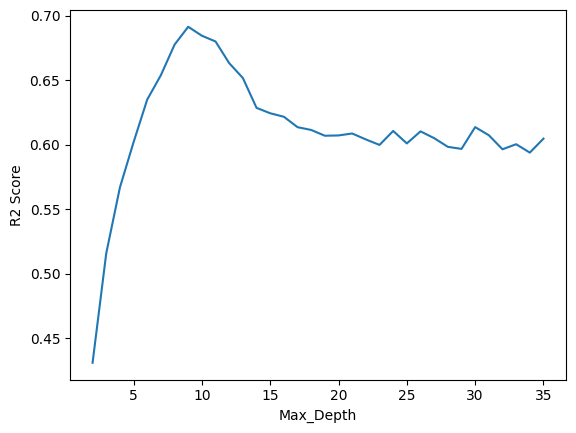

In [28]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores["Test Score"])
plt.xlabel("Max_Depth")
plt.ylabel("R2 Score");

### Sorting Test Data

In [29]:
# Sort by Best result on Test Data
sorted_scores = scores.sort_values(by="Test Score", ascending=False)
sorted_scores.head()

,Test Score,Train Score
9,0.691342,0.796167
10,0.684413,0.832209
11,0.679933,0.867597
8,0.677491,0.755168
12,0.663138,0.898104


In [35]:
# Let's run the model with our optimized value for max_depth
dec_tree_9 = DecisionTreeRegressor(max_depth= 9, random_state=42)
# Fit on the training data
dec_tree_9.fit(X_train, y_train)
# Get predictions 
train_preds = dec_tree_9.predict(X_train)
test_preds = dec_tree_9.predict(X_test)
# Calculate score
train_9_score = r2_score(y_train, train_preds)
test_9_score = r2_score(y_test, test_preds)
# Print results
print(f"Train R2 Score: {train_9_score:}.")
print(f"Test R2 Score: {test_9_score:}.")

Train R2 Score: 0.7961670169616584.
Test R2 Score: 0.6913416719998345.
